# IBM Advanced Data Science Capstone

This Capstone project has been completed as part of the IBM Advanced Data Science Specialization. 

## The Project

A stroke is a medical condition in which poor blood circulation to the brain causes cells to die. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.
 
In this project, A simple neural network will be built to predictive brain strokes given various features such as gender, age, hypotension, etc. This model will be evaluated based on its predictive accuracy on a validation set. This metric was chosen as this quantifies how well the model generalizes to unssen data.



## The Data

The dataset used in this notebook is the [Brain stroke prediction dataset](https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset?resource=download) from kaggle. This dataset was collected by medical researchers in Turkey as they tried to better predict brain strokes as part of their research.

Below are the data attributes:

* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
* evermarried: "No" or "Yes"
* worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
* Residencetype: "Rural" or "Urban"
* avgglucoselevel: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Importing Libraries



In [80]:
#importing libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
# load dataset
file = open('full_data.csv')
df = pd.read_csv(file)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Data Exploration

In [83]:
df.shape

(4981, 11)

In [84]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [85]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [86]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [87]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

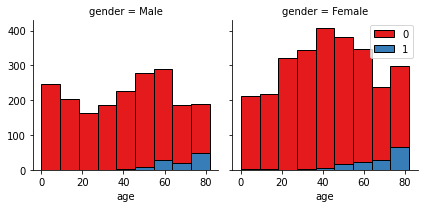

In [88]:
import seaborn as sns

bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="stroke", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

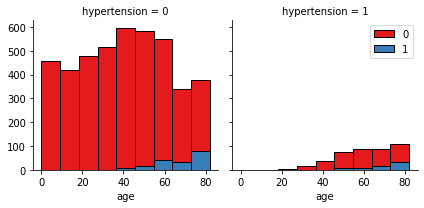

In [89]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="hypertension", hue="stroke", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

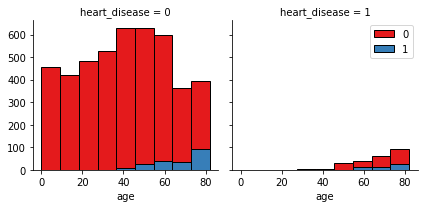

In [90]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="heart_disease", hue="stroke", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

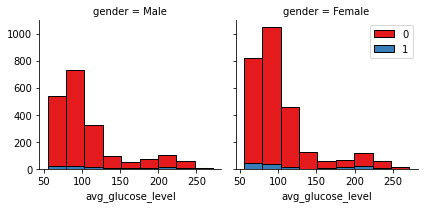

In [91]:
bins = np.linspace(df.avg_glucose_level.min(), df.avg_glucose_level.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="stroke", palette="Set1", col_wrap=2)
g.map(plt.hist, 'avg_glucose_level', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

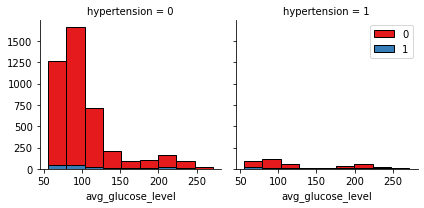

In [92]:
bins = np.linspace(df.avg_glucose_level.min(), df.avg_glucose_level.max(), 10)
g = sns.FacetGrid(df, col="hypertension", hue="stroke", palette="Set1", col_wrap=2)
g.map(plt.hist, 'avg_glucose_level', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

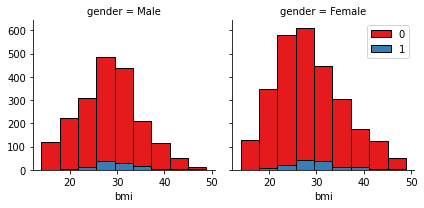

In [93]:
bins = np.linspace(df.bmi.min(), df.bmi.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="stroke", palette="Set1", col_wrap=2)
g.map(plt.hist, 'bmi', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## OneHotEncoding and Normalization

In [94]:
#onehotencoding

Features = df.iloc[:,:-1]
Target = df.iloc[:,-1:]

Features = pd.get_dummies(Features)
Feature_cols = list(Features.columns)

Features.shape

(4981, 19)

In [95]:
from sklearn.preprocessing import MinMaxScaler

Features = MinMaxScaler().fit_transform(Features)
Features = pd.DataFrame(Features,columns = Feature_cols)

Features.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.647564,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.975586,0.0,1.0,0.234512,0.530086,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.597168,0.0,0.0,0.536008,0.584527,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.963379,1.0,0.0,0.549349,0.286533,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.987793,0.0,0.0,0.605161,0.429799,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Splitiing the Data

In [96]:
# split the data

from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.2, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(Features, Target))

# Create the dataframes
x_train = Features.loc[train_idx]
y_train = Target.loc[train_idx]

x_test  = Features.loc[test_idx]
y_test  = Target.loc[test_idx]

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3984, 19)
x_test shape:  (997, 19)
y_train shape:  (3984, 1)
y_test shape:  (997, 1)


## Building the Machine Learning Model

### Simple Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

lr = LogisticRegression(solver='liblinear',
                       penalty = 'l1').fit(x_train, y_train)

In [98]:
y_pred = lr.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc

0.9498495486459378

### Simple Neural Network

In [99]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(Dense(64,activation='relu', input_shape=(19,)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1280      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 16)               

In [100]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                            batch_size=512, 
                            epochs=30,
                            validation_data=(x_test, y_test))

Epoch 1/30
8/8 [==============================] - 1s 38ms/step - loss: 0.3945 - accuracy: 0.9315 - val_loss: 0.3263 - val_accuracy: 0.9498
Epoch 2/30
8/8 [==============================] - 0s 13ms/step - loss: 0.3014 - accuracy: 0.9463 - val_loss: 0.2156 - val_accuracy: 0.9498
Epoch 3/30
8/8 [==============================] - 0s 12ms/step - loss: 0.3020 - accuracy: 0.9488 - val_loss: 0.2046 - val_accuracy: 0.9498
Epoch 4/30
8/8 [==============================] - 0s 13ms/step - loss: 0.2645 - accuracy: 0.9501 - val_loss: 0.2021 - val_accuracy: 0.9498
Epoch 5/30
8/8 [==============================] - 0s 8ms/step - loss: 0.2622 - accuracy: 0.9501 - val_loss: 0.2048 - val_accuracy: 0.9498
Epoch 6/30
8/8 [==============================] - 0s 8ms/step - loss: 0.2634 - accuracy: 0.9503 - val_loss: 0.2163 - val_accuracy: 0.9498
Epoch 7/30
8/8 [==============================] - 0s 9ms/step - loss: 0.2496 - accuracy: 0.9495 - val_loss: 0.2192 - val_accuracy: 0.9498
Epoch 8/30
8/8 [==============

## Feature Importance

In [101]:
from sklearn.inspection import permutation_importance, plot_partial_dependence

# produce an array of feature importances
feature_importances = permutation_importance(estimator=lr, X = x_train, y = y_train, n_repeats=2,
                                random_state=123, n_jobs=2)


feature_importances.importances.shape

(19, 2)

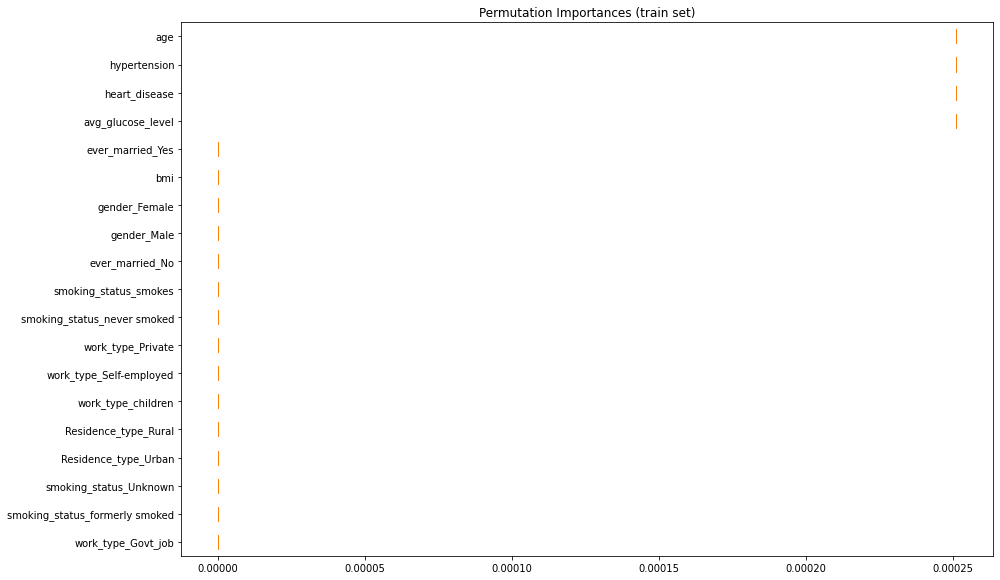

In [102]:
sorted_idx = feature_importances.importances_mean.argsort()
# Visualize the feature importances using boxplot
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.tight_layout()
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=x_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
plt.show()

The most important features are:
* age
* hypertension
* heart disease
* averge gloucose level

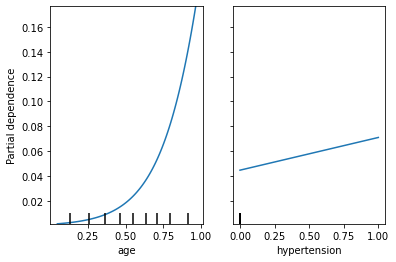

In [103]:
# Partial Dependence Plot
important_features = ['age', 'hypertension', 'heart_disease','avg_glucose_level']

plot_partial_dependence(estimator=lr, 
                        X=x_train, 
                        features=important_features[:2],
                        random_state=123)

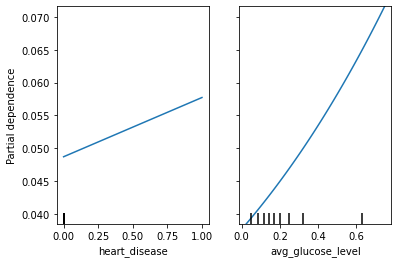

In [104]:
plot_partial_dependence(estimator=lr, 
                        X=x_train, 
                        features=important_features[-2:],
                        random_state=123)